In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  #reducing info,error messages

tf.keras.utils.set_random_seed(30)#ensures reproducibility of results when using TensorFlow for operations involving randomness

In [4]:
dataset = pd.read_csv("/content/drive/My Drive/AI_Human.csv")

Read and observe the properties of dataset used



                                                     text  generated
0       Cars. Cars have been around since they became ...        0.0
1       Transportation is a large necessity in most co...        0.0
2       "America's love affair with it's vehicles seem...        0.0
3       How often do you ride in a car? Do you drive a...        0.0
4       Cars are a wonderful thing. They are perhaps o...        0.0
...                                                   ...        ...
487030  In Miami, sitting in traffic is simply a part ...        0.0
487031  In the course of human history, there have bee...        1.0
487032  Dear Principal, 02/18/11\n\nI believe that (Po...        0.0
487033  In the past, owning a car has been very benefi...        0.0
487034  In America people use automobiles for everyday...        0.0

[487035 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dt

<Axes: xlabel='generated', ylabel='count'>

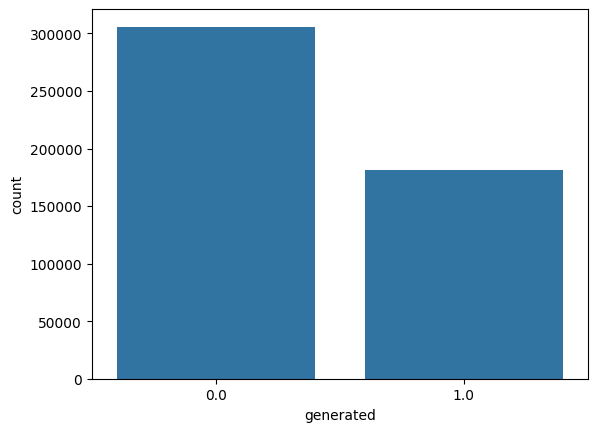

In [6]:
print(dataset.head(-200))
dataset.info()
dataset.describe()
sns.countplot(data=dataset,x='generated')

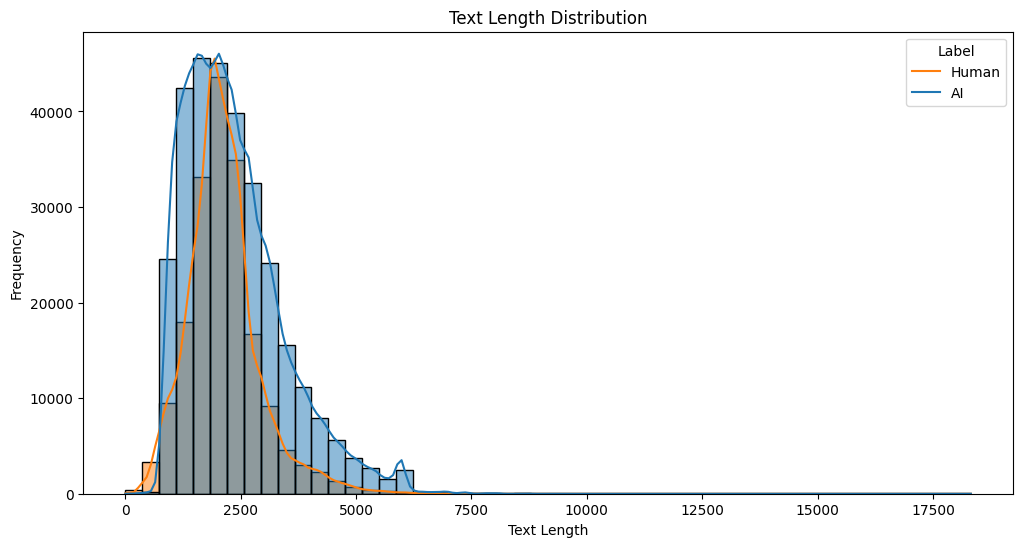

In [7]:
import matplotlib.pyplot as plt


# Add a column for text length
dataset['text_length'] = dataset['text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(dataset, x='text_length', hue='generated', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Human', 'AI'])
plt.show()


The histogram tells us that AI-generated texts are generally longer than texts written by humans. For AI, we see peaks in text length around 2000-3000 characters, while for humans it's more in the range of 1000-2000 characters. AI texts also have a wider range and longer tail, which means there are more instances of really long texts compared to what humans write. This suggests that AI tends to be more wordy or go into more detail. However, there is still significant overlap between the two distributions in the 1000-3000 character range, but AI texts more frequently go beyond 5000 characters.



In [8]:
print('Total Texts:', dataset['generated'].count())
print('Human Written Texts:', (dataset['generated'] == 0.0).sum())
print('AI Generated Texts:', (dataset['generated'] == 1.0).sum())

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [9]:
dataset['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [10]:
import re

def remove_tags(text):
    # Define regex pattern to match newline characters and single quotes
    pattern = r'[\n\']'
    # Use re.sub() to replace matched patterns with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Apply the remove_tags function to the 'text' column
dataset['text'] = dataset['text'].apply(remove_tags)


The remove_tags function is a handy tool that helps clean up text. It uses a special technique called regular expression to get rid of those pesky newline characters ('\n') and single quotes (' ' ') from any given text. This function is specifically designed to work its magic on the 'text' column of the dataset, ensuring that all instances of these characters are replaced with an empty string. So, with just a few lines of code, you can easily remove unwanted tags and make your text look clean and neat.



In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

string.punctuation is a constant in Python's string module that contains all standard punctuation characters (e.g., !"#$%&'()*+,-./:;<=>?@[\\]^_``{|}~). It is often used for tasks like removing or identifying punctuation in text processing.



In [12]:
def remove_punc(text):
    # Create translation table to map punctuation characters to None
    translation_table = str.maketrans('', '', string.punctuation)
    # Use translate() method to remove punctuation
    cleaned_text = text.translate(translation_table)
    return cleaned_text

dataset['text'] = dataset['text'].apply(remove_punc)


The remove_tags function is a handy tool that helps clean up text. It uses a special technique called regular expression to get rid of those pesky newline characters ('\n') and single quotes (' ' ') from any given text. This function is specifically designed to work its magic on the 'text' column of the dataset, ensuring that all instances of these characters are replaced with an empty string.



In [13]:
dataset['text']

0         Cars Cars have been around since they became f...
1         Transportation is a large necessity in most co...
2         Americas love affair with its vehicles seems t...
3         How often do you ride in a car Do you drive a ...
4         Cars are a wonderful thing They are perhaps on...
                                ...                        
487230    Tie Face on Mars is really just a big misunder...
487231    The whole purpose of democracy is to create a ...
487232    I firmly believe that governments worldwide sh...
487233    I DFNt agree with this decision because a LFT ...
487234    Richard Non Jimmy Carter and Bob Dole and othe...
Name: text, Length: 487235, dtype: object

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   text         487235 non-null  object 
 1   generated    487235 non-null  float64
 2   text_length  487235 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 11.2+ MB


In [15]:
#import nltk
"""from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    return ' '.join(lemmatized_tokens)"""

"from nltk.tokenize import word_tokenize\nfrom nltk.stem import WordNetLemmatizer\n# Download necessary NLTK data\nnltk.download('punkt')\nnltk.download('wordnet')\nnltk.download('omw-1.4')\n# Initialize the WordNetLemmatizer\nlemmatizer = WordNetLemmatizer()\ndef lemmatize_sentence(sentence):\n    tokens = word_tokenize(sentence)\n    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]\n    return ' '.join(lemmatized_tokens)"

So, here's what happens with the code: it starts by setting up NLTK's WordNetLemmatizer and creating a function called lemmatize_sentence. This function does something pretty cool - it takes a sentence, breaks it down into individual words, and then applies lemmatization to each word. Lemmatization is a process that helps convert words into their base or root form. Now, here's the thing - this process can take a while, especially if you're dealing with a lot of data. You see, each word needs to be processed individually, which can be time-consuming, especially for large datasets.



In [16]:
def get_sentence_vectorizer(sentences):
    tf.keras.utils.set_random_seed(30)  # Fix seed for reproducibility
    """
    Create a TextVectorization layer for sentence tokenization and adapt it to the provided sentences.

    Parameters:
    sentences (list of str): Sentences for vocabulary adaptation.

    Returns:
    sentence_vectorizer (tf.keras.layers.TextVectorization): TextVectorization layer for sentence tokenization.
    vocab (list of str): Extracted vocabulary.
    """
    # Lemmatize each sentence
    #lemmatized_sentences = [lemmatize_sentence(sentence) for sentence in sentences]

    # Define TextVectorization object with the appropriate parameters
    sentence_vectorizer = tf.keras.layers.TextVectorization(
        output_mode='int',
        output_sequence_length=None,
        standardize=None
    )

    # Adapt the sentence vectorization object to the given sentences
    #sentence_vectorizer.adapt(lemmatized_sentences)


    return sentence_vectorizer, []


The get_sentence_vectorizer function does a few things. It creates a TensorFlow TextVectorization layer that helps break down sentences into smaller parts. Then, it customizes the layer to work with the sentences you provide. Finally, it gives you the vectorizer itself, along with its vocabulary.

We decided to skip the step of lemmatizing sentences to make things easier when dealing with big sets of data. By combining system and user prompts, our goal is to make the assistant sound more like a real person. We want to keep the original content intact while ensuring that the information is clear and accurate.

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Get the text column from the dataset
sentences = dataset['text'].tolist()

# Get the sentence vectorizer
sentence_vectorizer, _ = get_sentence_vectorizer(sentences)

# Adapt the sentence vectorizer to the sentences
sentence_vectorizer.adapt(sentences)

# Get the vocabulary after adaptation
vocab = sentence_vectorizer.get_vocabulary()

# Tokenize the sentences using the sentence vectorizer
tokenized_sentences = sentence_vectorizer(sentences).numpy()

# Add the tokenized sentences to the DataFrame
dataset['tokenized_text'] = list(tokenized_sentences)

# Print the DataFrame to verify
print("DataFrame with tokenized sentences:\n", dataset)

# Separate the features and labels
X = dataset['tokenized_text']
y = dataset['generated']

# Padding sequences
x = pad_sequences(X, padding='post')

# Print X and y to verify
print("X (padded tokenized sentences):\n", x)
print("y (labels):\n", y)

DataFrame with tokenized sentences:
                                                      text  generated  \
0       Cars Cars have been around since they became f...        0.0   
1       Transportation is a large necessity in most co...        0.0   
2       Americas love affair with its vehicles seems t...        0.0   
3       How often do you ride in a car Do you drive a ...        0.0   
4       Cars are a wonderful thing They are perhaps on...        0.0   
...                                                   ...        ...   
487230  Tie Face on Mars is really just a big misunder...        0.0   
487231  The whole purpose of democracy is to create a ...        0.0   
487232  I firmly believe that governments worldwide sh...        1.0   
487233  I DFNt agree with this decision because a LFT ...        0.0   
487234  Richard Non Jimmy Carter and Bob Dole and othe...        0.0   

        text_length                                     tokenized_text  
0              3289  [434

So, here's the deal: this code takes text data from a dataset and does some cool stuff with it using TensorFlow's TextVectorization. Basically, it breaks down the sentences and adds them to the DataFrame. Then, it separates the features (which we'll call X) and the labels (we'll call them y). Oh, and it also makes sure that all the tokenized sequences have the same length by adding some padding. Pretty neat, huh?



In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Now, you can use X_train, X_test, y_train, y_test in your model training and evaluation process.


X_train shape: (389788, 4701)
X_test shape: (97447, 4701)
y_train shape: (389788,)
y_test shape: (97447,)


Here ensure that the shape for each input is uniform. This code splits the tokenized and padded text data (x) and labels (y) into training and evaluation sets, with 80% for training and 20% for evaluation, using a fixed random state for reproducibility.



In [19]:

# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(vocab), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The Embedding Layer takes each word index and converts it into a dense vector representation. This allows the model to understand the relationships between words and their meanings.

The Bidirectional LSTM Layer uses LSTM networks, which are great at understanding long-term connections in sequential data. By making it bidirectional, the model can capture information from both the past and future contexts of each word.

The Dense Layers are traditional fully connected layers that help the model capture more complex patterns in the data.

The Output Layer uses a sigmoid activation function to produce a binary classification output. It tells us whether the input text belongs to a specific class or not.

When it comes to Model Compilation, we configure it with the binary cross-entropy loss function, which is perfect for binary classification tasks. We choose the 'adam' optimizer for efficient gradient descent, and we use accuracy as the evaluation metric.

In [ ]:


model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
  99/3046 [..............................] - ETA: 6:36:01 - loss: 0.3611 - accuracy: 0.8316

Alright, let's dive into this line of code that's used to train the model. Here's a breakdown of what each part means:

X_train: This is the input training data, usually a sequence of word indices or embeddings.
y_train: These are the target labels that correspond to the training data.
epochs=10: This tells us how many times the entire training dataset will be fed forward and backward through the neural network.
batch_size=32: This determines the number of samples that will go through the network before the model's internal settings get updated.
validation_data=(X_eval, y_eval): This is a tuple that holds the validation data, which is used to assess the model's performance after each training round.
By running this line of code, the model will be trained on the provided training data (X_train and y_train) for 10 rounds. Each round will use a batch size of 32. Additionally, the model's performance will be evaluated using the validation data (X_eval and y_eval) after every round.

In [ ]:
# Define the path where you want to save the model in Google Drive
model_save_path = '/content/drive/My Drive/AIvsHuman.h5'

# Save the model
model.save(model_save_path)


In [ ]:

# Define the path where the model is saved
model_load_path = '/content/drive/My Drive/model.h5'

# Load the model
loaded_model = tf.keras.models.load_model(model_load_path)

# Verify the model by printing its summary
loaded_model.summary()

# Optionally, you can evaluate the model on the test set to ensure it loads correctly
# Assuming X_test and y_test are already defined and available
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

In [ ]:
# Function to make predictions
def predict_text(text):
    # Preprocess the input text
    processed_text = remove_punc(text)
    tokenized_text = sentence_vectorizer([processed_text]).numpy()

    # Make prediction
    prediction = model.predict(tokenized_text)[0][0]

    return prediction

Custom function to repeat the same process the sentences in the trainset go through for user input sentences.



In [ ]:
# Prompt the user for input to make predictions
while True:
    user_input = input("Enter text to predict (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    else:
        prediction = predict_text(user_input)
        print("Prediction:", prediction)

Creates an interactive loop where the user can input text to make predictions.